# Image Stitching Template
___
18 Jan, 2022 - PHS edit to include creating a stitched-image folder  
12 Dec, 2022 - PHS edit to test BaSiC implementation (see first 3 code blocks)  
10 Jun, 2023 - DFM designate as main template  


**Fordyce Lab**, **2020**

**Pinney Lab**, **2023**

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from htbam_analysis.stitching import scripts, rastering, stitching_settings, background_images
import os
import shutil

## Background

INFO:root:YOYO
INFO:root:Stitching images | Ch: egfp, Exp: None, Overlap: 0.1, Rot: -1.15


logger should be going
Running BaSiC for FF correction...


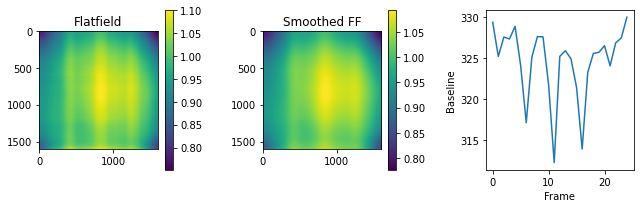

INFO:root:BaSiC Flat-Field Corrected Image | Ch: egfp, Exp: 500


completed BaSiC FF correction


INFO:root:Stitching images | Ch: dapi, Exp: None, Overlap: 0.1, Rot: -1.15


Running BaSiC for FF correction...


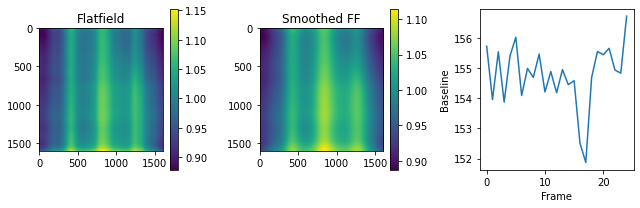

INFO:root:BaSiC Flat-Field Corrected Image | Ch: dapi, Exp: 300


completed BaSiC FF correction


In [25]:
## TEST BaSiC FF
bkgd_folder = '/Volumes/DuncanSSD/20230610_test/background'

settings = stitching_settings.StitchingSettings(
    setup_num = 1,
    tile_dim = 1600
    )

p = rastering.raster_params.RasterParams(overlap=0.1, 
    size=1600, 
    acqui_ori=(True, False),
    rotation = -1.15,
    auto_ff = True,
    ff_type = 'BaSiC')

scripts.walk_and_stitch(path=bkgd_folder,
 stitch_settings=settings, params=p, stitch_type = 'single')

## Button Quant

In [ ]:
## TEST BaSiC FF
button_quant_path = '/Volumes/DuncanSSD/20230426/standard'

scripts.walk_and_stitch(path=button_quant_path,
 stitch_settings=settings, params=p, stitch_type = 'single')

# Kinetics

In [ ]:
## TEST BaSiC FF
kinetics_path = '/Volumes/DuncanSSD/20230610_test/kinetics/'

scripts.walk_and_stitch(path=kinetics_path,
 stitch_settings=settings, params=p, stitch_type = 'kinetic')

<br>

## B. Standard Curve stitching (HT-MEK specific)

Stitching Standard:   0%|          | 0/8 [00:00<?, ?it/s]

Running BaSiC for FF correction...


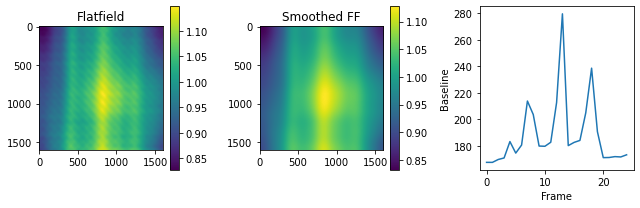

completed BaSiC FF correction


  io.imsave(outDir, stitchedRaster, plugin="tifffile")

Stitching Standard:  12%|█▎        | 1/8 [00:05<00:41,  5.89s/it]

Running BaSiC for FF correction...


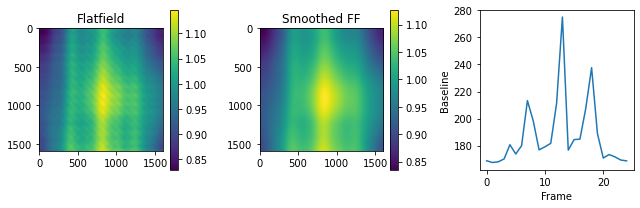

completed BaSiC FF correction


  io.imsave(outDir, stitchedRaster, plugin="tifffile")

Stitching Standard:  25%|██▌       | 2/8 [00:11<00:34,  5.71s/it]

Running BaSiC for FF correction...


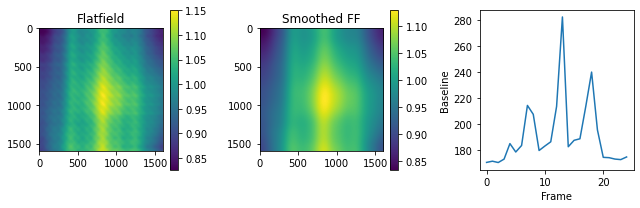

completed BaSiC FF correction


  io.imsave(outDir, stitchedRaster, plugin="tifffile")

Stitching Standard:  38%|███▊      | 3/8 [00:16<00:27,  5.47s/it]

Running BaSiC for FF correction...


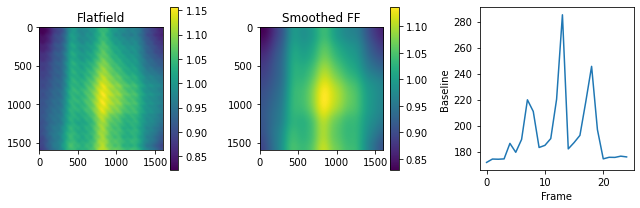

completed BaSiC FF correction


  io.imsave(outDir, stitchedRaster, plugin="tifffile")

Stitching Standard:  50%|█████     | 4/8 [00:21<00:21,  5.32s/it]

Running BaSiC for FF correction...


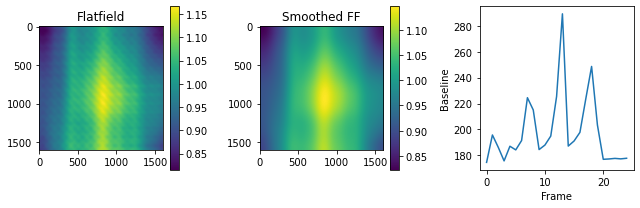

completed BaSiC FF correction


  io.imsave(outDir, stitchedRaster, plugin="tifffile")

Stitching Standard:  62%|██████▎   | 5/8 [00:26<00:15,  5.28s/it]

Running BaSiC for FF correction...


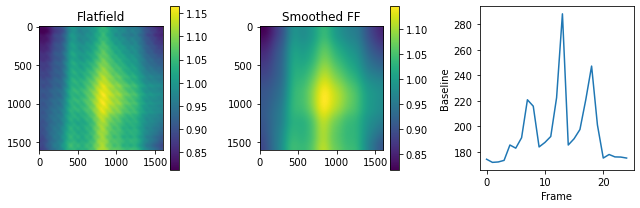

completed BaSiC FF correction


  io.imsave(outDir, stitchedRaster, plugin="tifffile")

Stitching Standard:  75%|███████▌  | 6/8 [00:32<00:10,  5.23s/it]

Running BaSiC for FF correction...


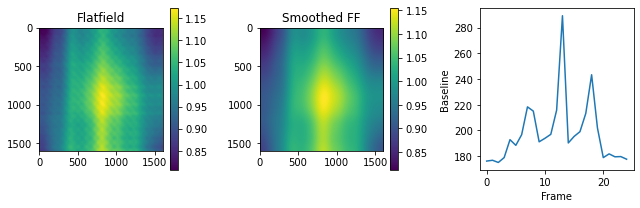

completed BaSiC FF correction


  io.imsave(outDir, stitchedRaster, plugin="tifffile")

Stitching Standard:  88%|████████▊ | 7/8 [00:37<00:05,  5.39s/it]

Running BaSiC for FF correction...


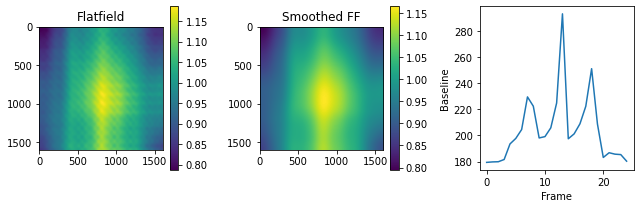

completed BaSiC FF correction


  io.imsave(outDir, stitchedRaster, plugin="tifffile")

Stitching Standard: 100%|██████████| 8/8 [00:43<00:00,  5.44s/it]


In [5]:
standard_path = '/Volumes/DuncanSSD/20230426/standard'

handles = [('0uM_pbp', 0), 
           ('0_3125uM_pbp', .3125), 
           ('0_625uM_pbp', .625), 
           ('1_25uM_pbp', 1.25), 
           ('2_5uM_pbp', 2.5),
           ('5uM_pbp', 5),
           ('10uM_pbp', 10),
           ('20uM_pbp', 20)]

scripts.stitch_standard(standard_path, p, handles)

<br>

## C. Background subtract

In [32]:
bg = background_images.BackgroundImages()

#### Define paths and add to the backgrounds

In [33]:
# Reference Background Image
backgroundsRootD1 = '/Volumes/DuncanSSD/20230610_test/background/20230403-130801-d3_background_egfp_500_Sola_2x2_Kinetix-DynamicRange_4x/egfp/StitchedImages/StitchedImg_500_egfp_0.tif'
bg.add(backgroundsRootD1, 'd1', 'egfp', 500)


#### Define target and execute

In [35]:
target = '/Volumes/DuncanSSD/20230610_test/button_quant'

bg.walk_and_bg_subtract(target, 'd1', 'egfp')

INFO:root:Background Subtracting | Ch: egfp, Ex: 500, Index: d1
